<h1> Projet KNN (K Nearest Neighbors classification) :</h1><br/>
<i>Classification selon les K plus proches voisins.</i><br/>
<b><u>Pour lancer le projet :</u></b> Cliquez sur Kernel --> Restart and Run All -> Relancer et executer toutes les cellules.<br/>
<i> (Ou bien, executer chaque cellule, les unes après les autres, dans l'ordre du Notebook :+ long.)</i>

In [1]:
def Lecture_listes(liste_connue,liste_inconnue): 
    """ Cette fonction ouvre les 2 listes contenant les nuances
    de gris, respectivement, des images classifiées de la liste 'training' 
    et, des images à tester de la liste 'testing' .
    Ces nuances de gris sont dans une chaîne de caractères : les
    valeurs sont donc isolées (split) et transformées en entiers (int):
    Ces entiers sont renvoyés dans 2 listes : listetraining et listetesting.
    """
    import sys
    train = open(liste_connue,"r") # on ouvre le fichier en mode lecture (r)
    test = open(liste_inconnue,"r")
    l1 = train.readlines()
    listetraining = [ligne.split() for ligne in l1] # On demande à construire 1 nouvelle liste d'éléments séparés par des ',' où chaque éléments est séparé d'un espace (split) dans la précédente liste
    assert(type(listetraining[0])==list),"Attention la construction de listetraining n'aboutit pas à une liste de liste." #Pré-condtition
    assert(type(listetraining[0][2])==str),"Attention, les arguments de la fonction ne contenait pas de chaînes de caractères." #Pré-condtition
    for image in listetraining:
        j = len(image) # j , variant d'itération, décroissant = preuve de terminaison
        numpixel = len(image) - j
        while j != 0: # numpixel va varier de 0 à len(image) - 1
            image[numpixel] = int(image[numpixel]) # Les listes initiales contenaient des nombres en string qu'on transforme en int pour travailler numériquement dessus    
            j=j-1 # j , variant d'itération, décroit = preuve de terminaison
            numpixel = len(image) - j
    l2 = test.readlines()
    listetesting = [ligne.split() for ligne in l2] 
    for image in listetesting:
        for numpixel in range(1,len(image)): # on enlève le '?' en début d'image, donc on ne démarre pas à 0
            image[numpixel] = int(image[numpixel]) # Les listes initiales contenaient des nombres en String
    assert(type(listetraining[0][2])==int),"Attention, listraining ne semble pas avoir changer ses str en int." # Post-condition
    assert(type(listetesting[0][2])==int),"Attention, listesting ne semble pas avoir changer ses str en int." # Post-condition
    return listetraining, listetesting

In [2]:
def binairisation_pixel(liste,Num_image,position_pixel):
    """on appelle un pixel par sa position dans une 
    liste (training ou testing :2D-->1D) dans un N° d'image.
    si la nuance de gris (0-255) est inférieure ou égale à 127 
    alors on renvois 0, sinon 1. = binairisation du pixel
    >>> binairisation_pixel([[0,0,130,55,0],[0,0,225,28,0]],0,2)
    1
    >>> binairisation_pixel([[0,0,130,55,0],[0,0,225,28,0]],1,3)
    0"""
    assert(len(liste)>Num_image),"Le N°d'image demandé n'est pas dans la liste _ la liste est trop courte"
    Nuance_gris_pixel=liste[Num_image][position_pixel]
    assert(Nuance_gris_pixel<256 and Nuance_gris_pixel>=0),"On doit avoir accès à la nuance de gris du pixel" # Pré-condition
    if Nuance_gris_pixel <= 127:
        Binaire_pixel=0
    else:
        Binaire_pixel=1
    assert(Binaire_pixel==1 or Binaire_pixel==0),"Le pixel n'a pas été binairisé" # Post-condition
    return Binaire_pixel
if __name__ == '__main__':
    import doctest
    doctest.testmod()

In [3]:
def distance_entre_2pixels(Binaire_pixel_testing,Binaire_pixel_training):
    """ si les 2 pixels comparés ont la même valeur (1 ou 0)
    alors la distance est nulle sinon elle est égale à 1"""
    assert(Binaire_pixel_testing==1 or Binaire_pixel_testing==0),"La valeur du pixel_testing entrant doit être binaire" # Pré-condition
    assert(Binaire_pixel_training==1 or Binaire_pixel_training==0),"La valeur du pixel_training entrant doit être binaire" # Pré-condition
    if Binaire_pixel_testing == Binaire_pixel_training:
        ditance_pixels = 0
    else:
        ditance_pixels = 1
    assert(ditance_pixels==0 or ditance_pixels==1),"La distance entre 2 pixels doit être binaire" # Post-condition
    return ditance_pixels

In [4]:
def distance_entre_2_images(listetesting,listetraining,image_testing,image_training):
    """ Réalisation de la somme des distances mesurées entre 2 pixels 
    appartenant à 2 images différentes mais situés à la même position.
    784 distances sont sommées correspondants aux 784 pixels de chaque image.
    * Invariant : Soit l'image est identique donc distance = 0, Soit l'image est inversée(0/1) et
    alors distance = 784, soit la distance est intermédiaire ; donc l'invariant est le fait
    que la distance est toujours comprise entre 0 inclus et 784 inclus."""
    liste_des_distances_des_pixels=[]
    assert(type(listetesting)==list),"Attention, la variable listetesting n'est pas une liste " # Pré-conditions
    assert(type(listetraining)==list),"Attention, la variable listetraining n'est pas une liste " # Pré-conditions
    assert(len(listetesting[image_testing])==len(listetraining[image_training])),"Les 2 images comparées doivent avoir le même nombre de pixels 1D" # Pré-condition
    j = 784 # Variant d'itération décroissant = Preuve de terminaison _ 784 pixels dans chaque image (28x28)
    while j != 0:
        position_pixel=(784 +1) -j # Parcours des pixels 1 à 784
        assert(position_pixel<785 and position_pixel>0),"Le parcours des pixels est hors image..!?"
        Binaire_pixel_testing=binairisation_pixel(listetesting,image_testing,position_pixel)
        Binaire_pixel_training=binairisation_pixel(listetraining,image_training,position_pixel)
        ditance_pixels=distance_entre_2pixels(Binaire_pixel_testing,Binaire_pixel_training)
        liste_des_distances_des_pixels.append(ditance_pixels)    
        j=j-1    # Décroissance du variant d'itération
    distance_2_images=sum(liste_des_distances_des_pixels)
    assert(distance_2_images>=0 and distance_2_images<785),"L'invariant distance_entre_2_images est non vérifié !" # Invariant : 
    return distance_2_images

In [5]:
def liste_tuple_distance_classe_imageTest_versus_data(listetesting,num,listetraining):
    """Construction d'une liste contenant autant de tuple (x,y,z) que d'images de training.
    Chaque tuple(x,y,z) décrit une comparaison entre l'image testing choisie et
    une des images de training, où x est la distance entre les 2 images,
    y est la classe (7 ou 3) de l'image de training,et z est l'index de l'image training.
    >>> listetraining, listetesting = Lecture_listes("training","testing")
    >>> num=0
    >>> res =liste_tuple_distance_classe_imageTest_versus_data(listetesting,num,listetraining)
    >>> res[0]== (39, 7, 108)
    True"""
    assert(type(listetesting)==list),"Attention, la variable listetesting n'est pas une liste " # Pré-conditions
    assert(type(listetraining)==list),"Attention, la variable listetraining n'est pas une liste " # Pré-conditions
    assert(isinstance(num,int)),"Attention, la réponse de l'utilisateur n'est pas un chiffre" # Pré-conditions
    assert(num<10 and num >=0),"Le N° d'image doit être compris entre 0 et 9." # Pré-conditions
    list_non_triee_distance_class=[]
    longueur_listetraining=len(listetraining)
    j=longueur_listetraining # Variant d'itération décroissant = Preuve de terminaison _ 200 images dans training
    while j != 0:
        parcours_data = longueur_listetraining - j
        distance_2_images=distance_entre_2_images(listetesting,listetraining,num,parcours_data)
        tuple_distance_classe=(distance_2_images,listetraining[parcours_data][0],parcours_data)
        list_non_triee_distance_class.append(tuple_distance_classe)
        j = j-1    # Décroissance du variant d'itération
    list_triee_distance_class=list_non_triee_distance_class
    list_triee_distance_class.sort()
    assert(len(list_triee_distance_class)==longueur_listetraining),"La liste des tuples n'a pas traité tous les éléments de training.." # Post-condition
    assert(type(list_triee_distance_class[0])==tuple), "Attention, la liste des tuples ne contient pas des tuples." # Post-condition
    assert(len(list_triee_distance_class[0])==3), "Attention, les tuples ne sont pas construits sur 3 éléments." # Post-condition
    return list_triee_distance_class
if __name__ == '__main__':
    import doctest
    doctest.testmod()

In [6]:
def deduction_classe_img_testee(list_triee_distance_class,ka):
    """ Cette fonction renvoie la classe majoritaire, le nombre de voisins
    de classe 7 et le nombre de voisins de classe 3. La classe majoritaire
    est évaluée parmis les ka classes des ka images plus proches de l'image
    testée, en comptabilisant les nombres de classe égales à 7, celles égales
    à 3 dans une liste de tuple ayant en index 1 la classe recherchée.
    >>> deduction_classe_img_testee([(10,7,2),(45,3,3),(62,7,6)],3)
    (7, 2, 1)"""
    assert(type(list_triee_distance_class[0])==tuple), "Attention, la liste des tuples ne contient pas des tuples." # Pré-condition
    assert(len(list_triee_distance_class[0])==3), "Attention, les tuples ne sont pas construits sur 3 éléments." # Pré-condition
    assert(type(ka)==int),"La variable k doit être un entier" # Pré-conditions
    assert(ka<201 and ka>0),"La valeur de k n'est pas comprise entre 1 et 200." # Pré-conditions
    Nb_sept=0
    Nb_trois=0
    #for parcours in range(0, ka):
    j = ka  # Variant d'itération décroissant = Preuve de terminaison _ ka tuples à parcourir
    while j != 0:
        i = ka -j 
        if list_triee_distance_class[i][1]==7:
            Nb_sept+=1
        else:
            Nb_trois+=1
        j = j-1    # Décroissance du variant d'itération
    if Nb_sept>Nb_trois:
        classe=7
    elif Nb_trois>Nb_sept:
        classe=3
    else:
        classe="Ambigue avec ce K ! "
    assert(Nb_sept+Nb_trois==ka),"Tous les cas de classe n'ont pas été comptabilisées..?" # Post-conditions
    assert(classe in (3,7,"Ambigue avec ce K ! ")),"La classe n'a pas été correctement obtenue." # Post-conditions
    return classe,Nb_sept ,Nb_trois
if __name__ == '__main__':
    import doctest
    doctest.testmod()

In [7]:
import numpy as np
import matplotlib
from matplotlib.pyplot import *
from pylab import *
def Represente_graphe(Liste_visee,Nom_liste_visee,list_img,largeur_voulue,espacement):
    """ Cette fonction affiche l'image que l'on souhaite tester, puis elle affiche les
    k images plus proches voisins de l'image à tester pris dans la liste training.
    Les k voisins sont présentés par ligne de 10 images pour limitter l'ocuppation de l'écran."""
    assert(isinstance(largeur_voulue,int)),"La largeur voulue doit être un entier" # Pré-conditions
    assert(isinstance(espacement,int)),"L'espacement doit être un entier" # Pré-conditions
    assert(type(Nom_liste_visee)==str),"Attention, la variable Liste_visee n'est pas une string " # Pré-conditions
    assert(type(Liste_visee)==list),"Attention, la variable Nom_liste_visee n'est pas une liste " # Pré-conditions
    assert(all(isinstance(item, int) for item in list_img)),"L'utilisateur doit demander un nombre comme choix d'image" # Pré-condition 
    Nb_img=len(list_img)
    if Nom_liste_visee=="testing": # Ici, on affiche uniquement l'image à tester
        tab = Liste_visee[list_img[0]] # On récupère les données des pixels de l'image d'intérêt dans Listesting
        tableau = np.array(tab[1:]),(28,28) # On place ces données dans une matrice numpy 28x28, sans le '?' en index 0 !
        titre="Image(s) de la liste : "+Nom_liste_visee # On prépare un titre de cette image
        plt.figure(figsize=(1,2)) # On impose des proportions du visuel de l'image
        plt.suptitle(titre, fontsize=16)# on écrit le titre
        plt.subplot(1,Nb_img,1) # On positionne notre image sur 1 ligne , 1 colonne
        titre_image="index N°"+str(list_img[0]) # On prépare un sous-titre
        plt.title(titre_image) # On écrit le sous-titre
        plt.axis('off') # On demande de retirer les axes
        tabli = np.reshape(tableau[0],tableau[1]) # On donne une nouvelle forme au tableau
        plt.imshow(tabli, cmap="gray_r") # l'impression est lancée en gris
    else:
        Nb_dizaine=Nb_img//10 # On cherche à savoir, selon k, combien de dizaine d'images( donc de lignes) on doit afficher
        Nb_images_restantes=Nb_img-(Nb_dizaine*10) # On récupère le nombre d'images à présenter en dehors des lignes de dizaine d'images
        j = Nb_dizaine # Variant d'itération j
        while j != 0: # Preuve de terminaison sur le variant décroissant j
            ligne = Nb_dizaine - j
            figure(figsize=(largeur_voulue,espacement))
            Prem_img_dizene=ligne*10 # Détermination de l'index de la 1ère image à placer en début de chaque ligne de 10 images
            for Img_Num in range(Prem_img_dizene,(ligne+1)*10):
                tab = Liste_visee[list_img[Img_Num]]
                tableau = np.array(tab[1:]),(28,28)
                if ligne==0: # On ne place le titre de l'ensemble des images de Training qu'un seule fois : avant la 1ère ligne de dizaine
                    titre="Image(s) de la liste : "+Nom_liste_visee
                    suptitle(titre, fontsize=16)
                subplot(ligne+1,10,Img_Num+1) # On indique sur quelle ligne, pour combien de colonne, et à quelle colonne se trouve l'image.
                titre_image="index N°"+str(list_img[Img_Num]) # On sous-titre par le N° d'index de l'image
                title(titre_image)
                axis('off')
                imshow(np.reshape(tableau[0],tableau[1]) , cmap="gray_r" )
            j = j - 1 # Le variant d'itération j, preuve de terminaison subi une décroissance
        if Nb_images_restantes !=0: # Il ne reste plus qu'à présenter les image Unitaires de k (Ex : 52 --> 2)
            init=Nb_dizaine*10 # on définit l'index de la 1ère image restante des images unitaires
            fin = (Nb_dizaine*10)+(Nb_images_restantes) # on définit l'index de la dernière image restante des images unitaires
            largeur=(largeur_voulue/10)*Nb_images_restantes # La variable 'largeur_voulue' était pour 10 images, on corrige ici cette largeur en  fonction du Nb d'image restante.
            figure(figsize=(largeur,espacement)) # On impose des proportions du visuel de l'image
            i = Nb_images_restantes # i variant d'itération décroissant --> preuve de terminaison
            Img_Num = fin - i
            while Img_Num != fin-1: # On boucle l'impression d'images sur les N° d'index restants : d'init à fin
                Img_Num = fin - i 
                tab = Liste_visee[list_img[Img_Num]]
                tableau = np.array(tab[1:]),(28,28) 
                subplot(1,Nb_images_restantes,Img_Num-init+1) # ici, le nombre de colonne est limitée par le nombre d'images restantes unitaires
                titre_image="index N°"+str(list_img[Img_Num])
                title(titre_image)
                axis('off')
                imshow(np.reshape(tableau[0],tableau[1]) , cmap="gray_r" )
                i =i -1


Quelle image voulez-vous tester (entre 0 et 9) ? : 2
Quelle valeur de k souhaitez-vous (1 - 200) ? : 38


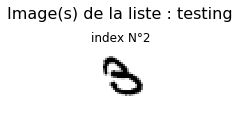

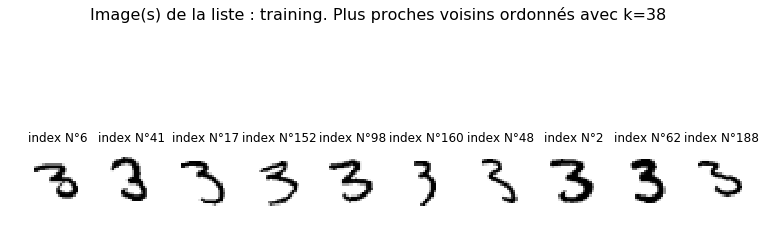

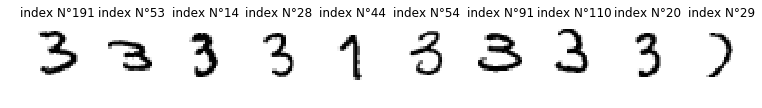

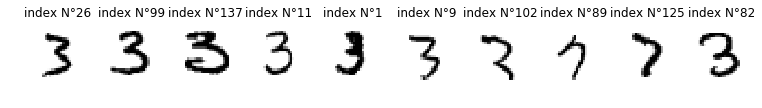

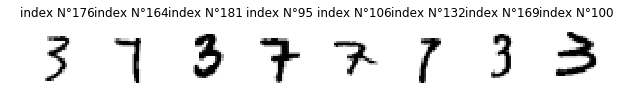


L'image la plus proche de l'image testée dans la liste training est l'image d'index N° :  6

Selon k =  38  , la classe de l'image testée est donc :  3  avec  8  sept et  30  trois parmis les voisins.


In [8]:
listetraining, listetesting = Lecture_listes("training","testing")
num = input("\nQuelle image voulez-vous tester (entre 0 et 9) ? : ")
assert(num.isnumeric()),"La réponse de l'utilisateur doit être un chiffre."
num = int(num)
ka=int(input("Quelle valeur de k souhaitez-vous (1 - 200) ? : "))
assert(ka<201 and ka>0),"La valeur de k n'est pas comprise entre 1 et 200."
list_img=[num] # On envois dans list_img les images qu'on veut voir : ici, 1 seule : l'image à tester
Represente_graphe(listetesting,"testing",list_img,1,2)
show()
list_triee_distance_class=liste_tuple_distance_classe_imageTest_versus_data(listetesting,num,listetraining)
list_img=[]
for k in range(ka):
    list_img.append(list_triee_distance_class[k][2]) # On envois dans list_img les images qu'on veut voir : ici, k images des + proches voisins
titre="training. Plus proches voisins ordonnés avec k="+str(ka)
Represente_graphe(listetraining,titre,list_img,13,5) 
show()
img_plus_proche=list_triee_distance_class[0][2]
print("\nL'image la plus proche de l'image testée dans la liste training est l'image d'index N° : ",img_plus_proche)
classe,Nb_sept,Nb_trois=deduction_classe_img_testee(list_triee_distance_class,ka)
print("\nSelon k = ",ka," , la classe de l'image testée est donc : ", classe," avec ",Nb_sept," sept et ",Nb_trois," trois parmis les voisins.")